The purpose of creating this machine learning model is to be able to cluster similar customers.

# Load Dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# scalling
from sklearn.preprocessing import StandardScaler
# modelling
from sklearn.cluster import KMeans
#silhoute
import sklearn.cluster as cluster
import sklearn.metrics as metrics

In [3]:
import warnings

# Disable all warnings
warnings.filterwarnings("ignore")

# Or, only disable specific warnings based on category
# Example: Disabling DeprecationWarning
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [4]:
df = pd.read_csv("df_kalbe.csv")

In [5]:
df.head()

,transactionid,customerid,Date,productid,price,qty,totalamount,storeid,storeid.1,storename,...,latitude,longitude,productid.1,Product Name,price.1,customerid.1,age,gender,Marital Status,income
0,TR11369,328,01/01/2022,P3,7500,4,30000,12,12,Prestasi Utama,...,"-2,990934","104,756554",P3,Crackers,7500,328,36,0,Married,"10,53"
1,TR16356,165,01/01/2022,P9,10000,7,70000,1,1,Prima Tendean,...,"-6,2","106,816666",P9,Yoghurt,10000,165,44,1,Married,"14,58"
2,TR1984,183,01/01/2022,P1,8800,4,35200,4,4,Gita Ginara,...,"-6,966667","110,416664",P1,Choco Bar,8800,183,27,1,Single,"0,18"
3,TR35256,160,01/01/2022,P1,8800,7,61600,4,4,Gita Ginara,...,"-6,966667","110,416664",P1,Choco Bar,8800,160,48,1,Married,"12,57"
4,TR41231,386,01/01/2022,P9,10000,1,10000,4,4,Gita Ginara,...,"-6,966667","110,416664",P9,Yoghurt,10000,386,33,0,Married,"6,95"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transactionid   5020 non-null   object
 1   customerid      5020 non-null   int64 
 2   Date            5020 non-null   object
 3   productid       5020 non-null   object
 4   price           5020 non-null   int64 
 5   qty             5020 non-null   int64 
 6   totalamount     5020 non-null   int64 
 7   storeid         5020 non-null   int64 
 8   storeid.1       5020 non-null   int64 
 9   storename       5020 non-null   object
 10  groupstore      5020 non-null   object
 11  Type            5020 non-null   object
 12  latitude        5020 non-null   object
 13  longitude       5020 non-null   object
 14  productid.1     5020 non-null   object
 15  Product Name    5020 non-null   object
 16  price.1         5020 non-null   int64 
 17  customerid.1    5020 non-null   int64 
 18  age     

In [7]:
df = df.drop(["storeid.1", "productid.1", "price.1", "customerid.1"], axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transactionid   5020 non-null   object
 1   customerid      5020 non-null   int64 
 2   Date            5020 non-null   object
 3   productid       5020 non-null   object
 4   price           5020 non-null   int64 
 5   qty             5020 non-null   int64 
 6   totalamount     5020 non-null   int64 
 7   storeid         5020 non-null   int64 
 8   storename       5020 non-null   object
 9   groupstore      5020 non-null   object
 10  Type            5020 non-null   object
 11  latitude        5020 non-null   object
 12  longitude       5020 non-null   object
 13  Product Name    5020 non-null   object
 14  age             5020 non-null   int64 
 15  gender          5020 non-null   int64 
 16  Marital Status  4976 non-null   object
 17  income          5020 non-null   object
dtypes: int64

In [9]:
df.shape

(5020, 18)

In [10]:
df.duplicated().info()

<class 'pandas.core.series.Series'>
RangeIndex: 5020 entries, 0 to 5019
Series name: None
Non-Null Count  Dtype
--------------  -----
5020 non-null   bool 
dtypes: bool(1)
memory usage: 5.0 KB


In [11]:
df.isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   transactionid   5020 non-null   bool 
 1   customerid      5020 non-null   bool 
 2   Date            5020 non-null   bool 
 3   productid       5020 non-null   bool 
 4   price           5020 non-null   bool 
 5   qty             5020 non-null   bool 
 6   totalamount     5020 non-null   bool 
 7   storeid         5020 non-null   bool 
 8   storename       5020 non-null   bool 
 9   groupstore      5020 non-null   bool 
 10  Type            5020 non-null   bool 
 11  latitude        5020 non-null   bool 
 12  longitude       5020 non-null   bool 
 13  Product Name    5020 non-null   bool 
 14  age             5020 non-null   bool 
 15  gender          5020 non-null   bool 
 16  Marital Status  5020 non-null   bool 
 17  income          5020 non-null   bool 
dtypes: bool(18)
memory usage: 88

# Data Aggregation

In [12]:
aggregated_data = df.groupby('customerid').agg({
    'transactionid': 'count',
    'qty': 'sum',
    'totalamount': 'sum'
}).reset_index()

In [13]:
aggregated_data.rename(columns={'transactionid' : "TotalTransaction", 'qty' : 'TotalQuantity', 'totalamount' : "TotalAmount"}, inplace=True)

In [14]:
aggregated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   customerid        447 non-null    int64
 1   TotalTransaction  447 non-null    int64
 2   TotalQuantity     447 non-null    int64
 3   TotalAmount       447 non-null    int64
dtypes: int64(4)
memory usage: 14.1 KB


In [15]:
aggregated_data.describe()

,customerid,TotalTransaction,TotalQuantity,TotalAmount
count,447.000000,447.000000,447.000000,447.000000
mean,224.000000,11.230425,40.930649,362512.304251
std,129.182042,3.245302,12.756679,124634.279184
min,1.000000,3.000000,10.000000,92100.000000
25%,112.500000,9.000000,32.000000,271750.000000
50%,224.000000,11.000000,40.000000,354200.000000
75%,335.500000,14.000000,50.000000,441200.000000
max,447.000000,21.000000,79.000000,846700.000000


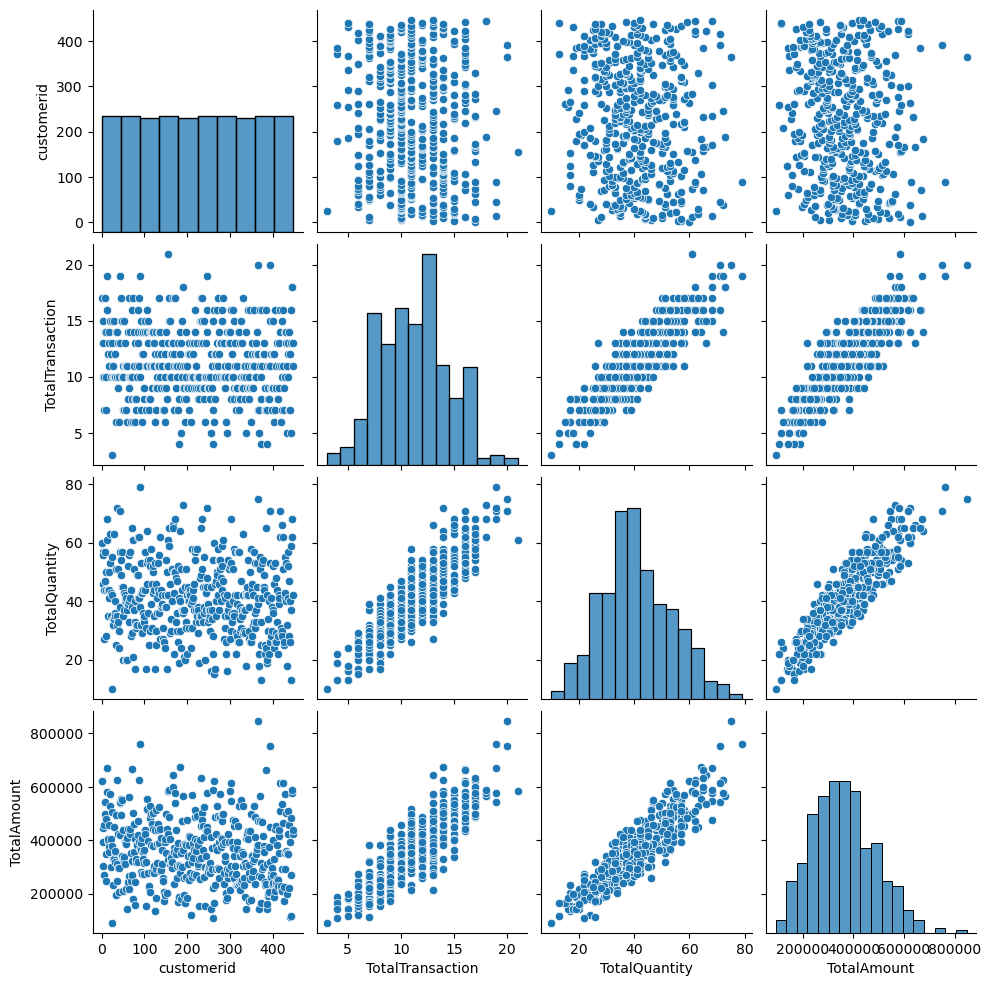

In [16]:
sns.pairplot(data = aggregated_data)

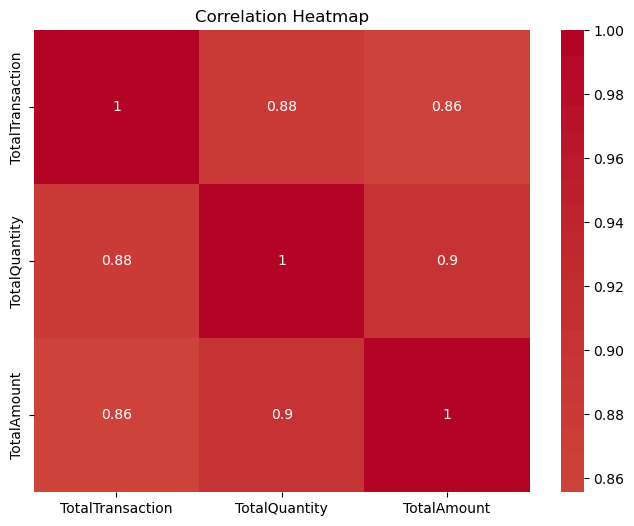

In [17]:
# Menghitung korelasi antara variabel
correlation_matrix = aggregated_data[['TotalTransaction','TotalQuantity', 'TotalAmount']].corr()

# Membuat heatmap untuk visualisasi korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [18]:
# Scaling
sc = StandardScaler()
dfoutlier_std = sc.fit_transform(aggregated_data[['TotalTransaction','TotalQuantity','TotalAmount']].astype(float))

new_dfoutlier_std = pd.DataFrame(data = dfoutlier_std, columns = ['TotalTransaction','TotalQuantity','TotalAmount'])
     

In [19]:
new_dfoutlier_std.head()

,TotalTransaction,TotalQuantity,TotalAmount
0,1.779816,1.496527,2.094768
1,0.545884,1.261093,0.239269
2,1.162850,1.182615,0.672218
3,-0.379565,0.397833,-0.482047
4,-1.305014,-1.093251,-0.754347


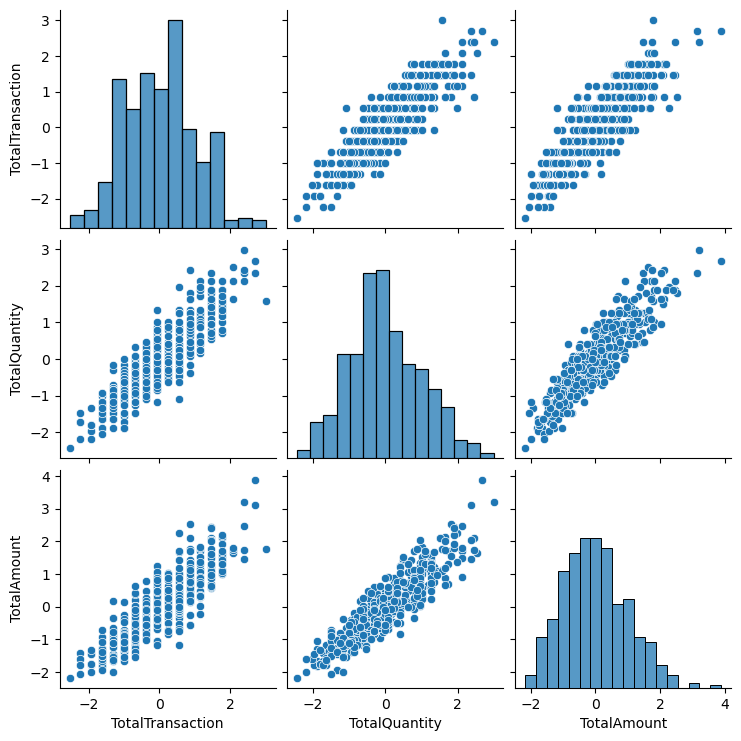

In [20]:
sns.pairplot(new_dfoutlier_std)

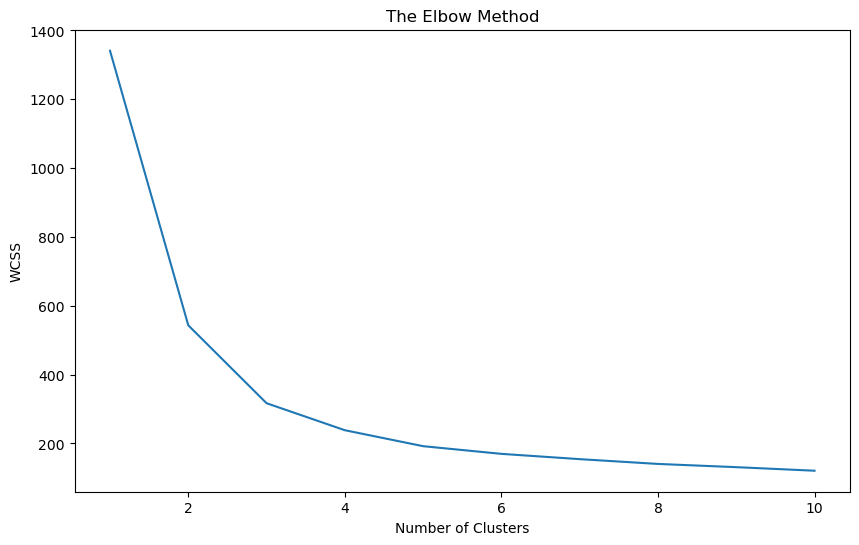

In [21]:
# Elbow Method
# declare Within-Cluster Sum of Squares (wcss)
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init='k-means++', random_state = 42)
  kmeans.fit(new_dfoutlier_std)
  wcss.append(kmeans.inertia_)
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

From elbow we can choose 3 or 4 cluster for K

In [22]:
# Silhoute Method
for i in range(2,13):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=42).fit(new_dfoutlier_std).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(new_dfoutlier_std,labels,metric="euclidean",random_state=42)))
     

Silhouette score for k(clusters) = 2 is 0.48530485981509097
Silhouette score for k(clusters) = 3 is 0.4286478086768933
Silhouette score for k(clusters) = 4 is 0.3772419295085858
Silhouette score for k(clusters) = 5 is 0.34260947001461384
Silhouette score for k(clusters) = 6 is 0.30030062675665914
Silhouette score for k(clusters) = 7 is 0.27705499749929946
Silhouette score for k(clusters) = 8 is 0.28575874607880475
Silhouette score for k(clusters) = 9 is 0.259869324734894
Silhouette score for k(clusters) = 10 is 0.2712977844048995
Silhouette score for k(clusters) = 11 is 0.2683613508800677
Silhouette score for k(clusters) = 12 is 0.2636695401476794


In [38]:
# k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42).fit(new_dfoutlier_std)
labels = kmeans.labels_
new_dfoutlier_std['label_kmeans'] = labels

In [39]:
new_dfoutlier_std.head()

,TotalTransaction,TotalQuantity,TotalAmount,label_kmeans
0,1.779816,1.496527,2.094768,0
1,0.545884,1.261093,0.239269,0
2,1.162850,1.182615,0.672218,0
3,-0.379565,0.397833,-0.482047,2
4,-1.305014,-1.093251,-0.754347,1


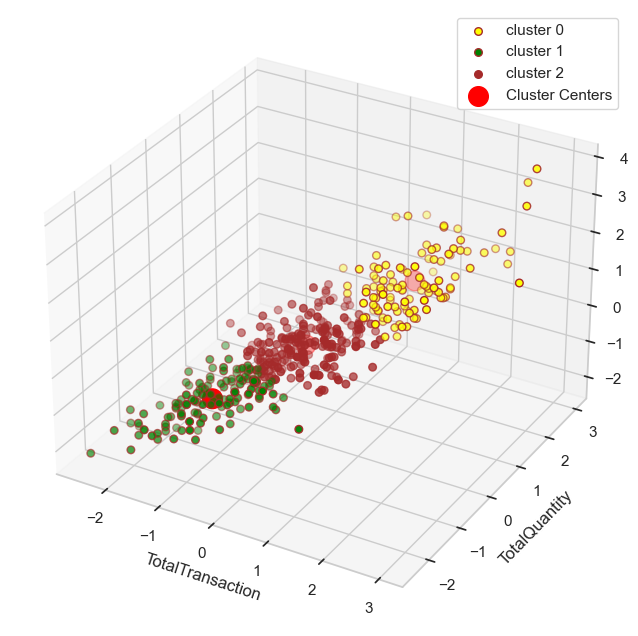

In [40]:
colors_cluster=['yellow','green', 'brown']
label_cluster=['cluster 0', 'cluster 1', "cluster 2"]

# PLOTTING
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for points in clusters
for cluster_id in range(3):
    cluster_data = new_dfoutlier_std[new_dfoutlier_std["label_kmeans"] == cluster_id]
    ax.scatter(cluster_data["TotalTransaction"], cluster_data["TotalQuantity"], cluster_data["TotalAmount"],
               c=colors_cluster[cluster_id], s=30, edgecolor='brown', label=label_cluster[cluster_id])

# Scatter plot for cluster centers (red)
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='red', s=200, label='Cluster Centers')

# Set labels and legend
ax.set_xlabel('TotalTransaction')
ax.set_ylabel('TotalQuantity')
ax.set_zlabel('TotalAmount')
ax.legend()

plt.show()

In [41]:
# copy label cluster to origin data
df_customer_clustering = aggregated_data.copy()
df_customer_clustering['cluster'] = kmeans.labels_

In [42]:
df_customer_clustering.head()

,customerid,TotalTransaction,TotalQuantity,TotalAmount,cluster
0,1,17,60,623300,0
1,2,13,57,392300,0
2,3,15,56,446200,0
3,4,10,46,302500,2
4,5,7,27,268600,1


In [43]:
# Calculate the average metrics for each cluster, including customer count, mean TotalTransaction, mean TotalQuantity, and mean TotalAmount.
df_customer_clustering.groupby('cluster').agg({'customerid':'count',
                                               'TotalTransaction':'mean',
                                               'TotalQuantity':'mean',
                                               'TotalAmount':'mean'
                                               }).sort_values(by='TotalAmount').reset_index()

,cluster,customerid,TotalTransaction,TotalQuantity,TotalAmount
0,1,135,7.785185,26.933333,229388.888889
1,2,202,11.282178,41.188119,363267.326733
2,0,110,15.363636,57.636364,524504.545455


Cluster 2 has the highest number of customers.

Cluster 0 (Moderate Shopper): This indicates that customers in this cluster tend to make purchases of regular quantity and value.

Cluster 1 (High Value Shopper): This indicates that customers in this cluster tend to make purchases with high monetary value.

Cluster 2 (Balanced Shopper): This indicates that customers in this cluster exhibit balanced purchasing behavior in terms of quantity and value.

In [30]:
df_customer_clustering.to_csv('df_customer_clustering.csv',index=False)
     

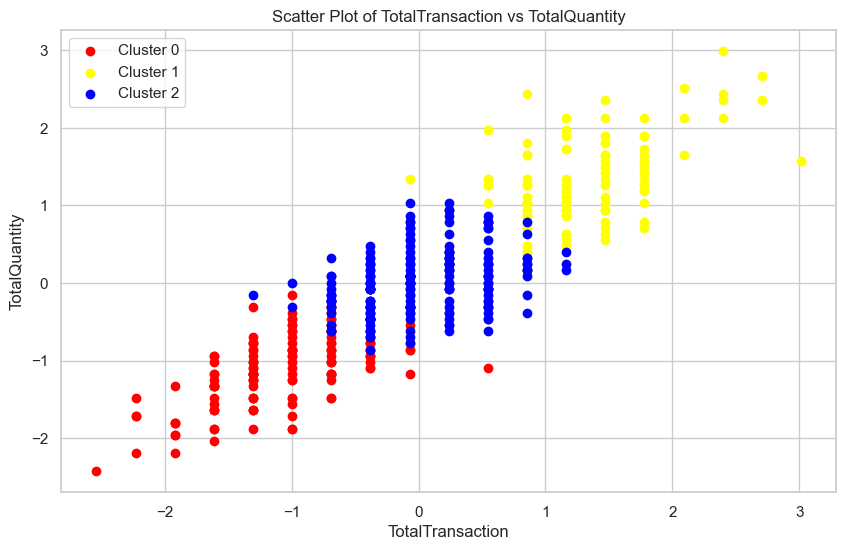

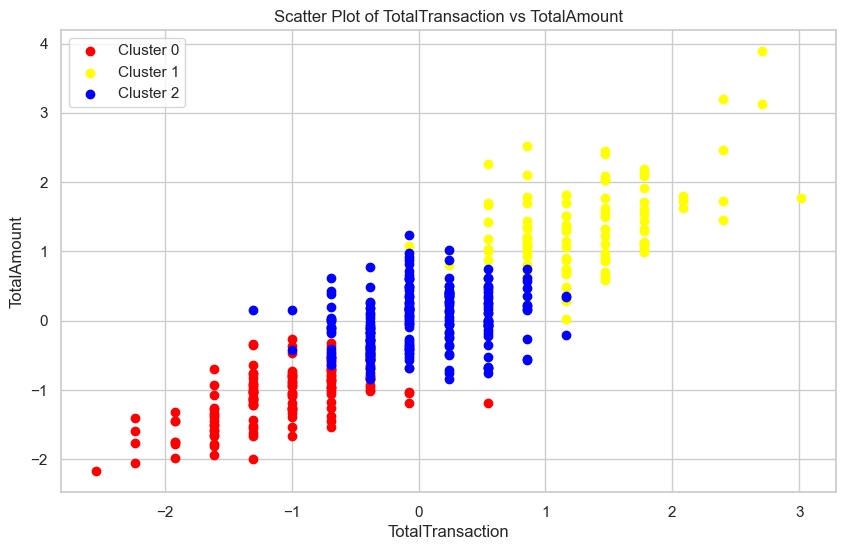

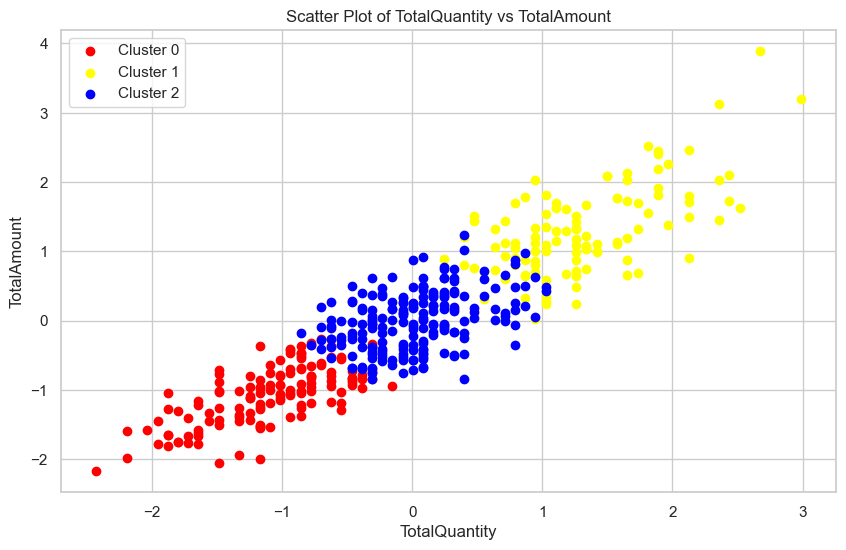

In [31]:
# Set style
sns.set(style="whitegrid")

# Define colors for clusters
cluster_colors = ['red','yellow','blue']

# Create scatter plots for each feature pair
feature_pairs = [('TotalTransaction', 'TotalQuantity'), ('TotalTransaction', 'TotalAmount'), ('TotalQuantity', 'TotalAmount')]

for pair in feature_pairs:
    plt.figure(figsize=(10, 6))
    for cluster_num in range(len(cluster_colors)):
        cluster_data = new_dfoutlier_std[new_dfoutlier_std.label_kmeans == cluster_num]
        plt.scatter(cluster_data[pair[0]], cluster_data[pair[1]], color=cluster_colors[cluster_num], label=f'Cluster {cluster_num}')
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.title(f'Scatter Plot of {pair[0]} vs {pair[1]}')
    plt.legend()
    plt.show()

Cluster 0 (Medium Spender):

Marketing Strategy: Encourage them to shop more frequently to increase their transaction value. Send marketing product notifications via email.
Promotions: Special promotions and discounts to motivate this cluster to shop more frequently.

Cluster 2 (Balanced Shoppers):

Marketing Strategy: Customers in this cluster have a medium transaction value, which indicates that they are quite active. Focus on maintaining their activity level and building further engagement.
Promotion: Offer exclusive discounts or special deals that are only available to customers in this cluster as a token of appreciation.

Cluster 1 (High Value Shoppers):

Marketing Strategy: Focus on maintaining strong relationships with customers in this cluster, as they contribute significantly to the business.
Promotion: Introduce a premium loyalty program that offers additional benefits to customers in this cluster. This could include exclusive discounts, early access to new products, or luxury gifts.